In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('../datasets/filtered_data.csv')

In [22]:
df

,Unnamed: 0,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,466549,32,399000,0,1990-01-01,0.120,0.0384,2,-23.130,1,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,4
1,308270,26,105773,0,1990-01-01,0.651,0.4030,9,-18.081,0,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,4
2,308269,27,156373,0,1990-01-01,0.666,0.2510,0,-15.409,1,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,3
3,308268,27,152693,0,1990-01-01,0.716,0.3790,4,-16.092,1,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,4
4,308267,27,288613,0,1990-01-01,0.738,0.3920,0,-12.055,1,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314893,118480,14,185714,0,2020-12-31,0.759,0.7050,8,-5.939,1,0.1330,0.00701,0.595000,0.0356,0.6650,83.985,4
314894,93551,13,117091,1,2020-12-31,0.651,0.8620,5,-4.246,1,0.0852,0.00406,0.000293,0.2860,0.5440,164.861,4
314895,562676,56,243409,0,2020-12-31,0.522,0.5750,2,-4.722,1,0.0280,0.06260,0.000000,0.3820,0.4740,87.879,4
314896,352879,59,184323,0,2020-12-31,0.842,0.7570,5,-6.339,0,0.2810,0.06000,0.000000,0.0628,0.5780,111.938,4


In [23]:
df = df.drop(columns= 'Unnamed: 0')

In [24]:
df = df[df['popularity'] > 0]

In [25]:
df

,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,32,399000,0,1990-01-01,0.120,0.0384,2,-23.130,1,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,4
1,26,105773,0,1990-01-01,0.651,0.4030,9,-18.081,0,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,4
2,27,156373,0,1990-01-01,0.666,0.2510,0,-15.409,1,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,3
3,27,152693,0,1990-01-01,0.716,0.3790,4,-16.092,1,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,4
4,27,288613,0,1990-01-01,0.738,0.3920,0,-12.055,1,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314893,14,185714,0,2020-12-31,0.759,0.7050,8,-5.939,1,0.1330,0.00701,0.595000,0.0356,0.6650,83.985,4
314894,13,117091,1,2020-12-31,0.651,0.8620,5,-4.246,1,0.0852,0.00406,0.000293,0.2860,0.5440,164.861,4
314895,56,243409,0,2020-12-31,0.522,0.5750,2,-4.722,1,0.0280,0.06260,0.000000,0.3820,0.4740,87.879,4
314896,59,184323,0,2020-12-31,0.842,0.7570,5,-6.339,0,0.2810,0.06000,0.000000,0.0628,0.5780,111.938,4


In [26]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

In [27]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [28]:
df = df.drop(columns = 'years_since_release')

KeyError: "['years_since_release'] not found in axis"

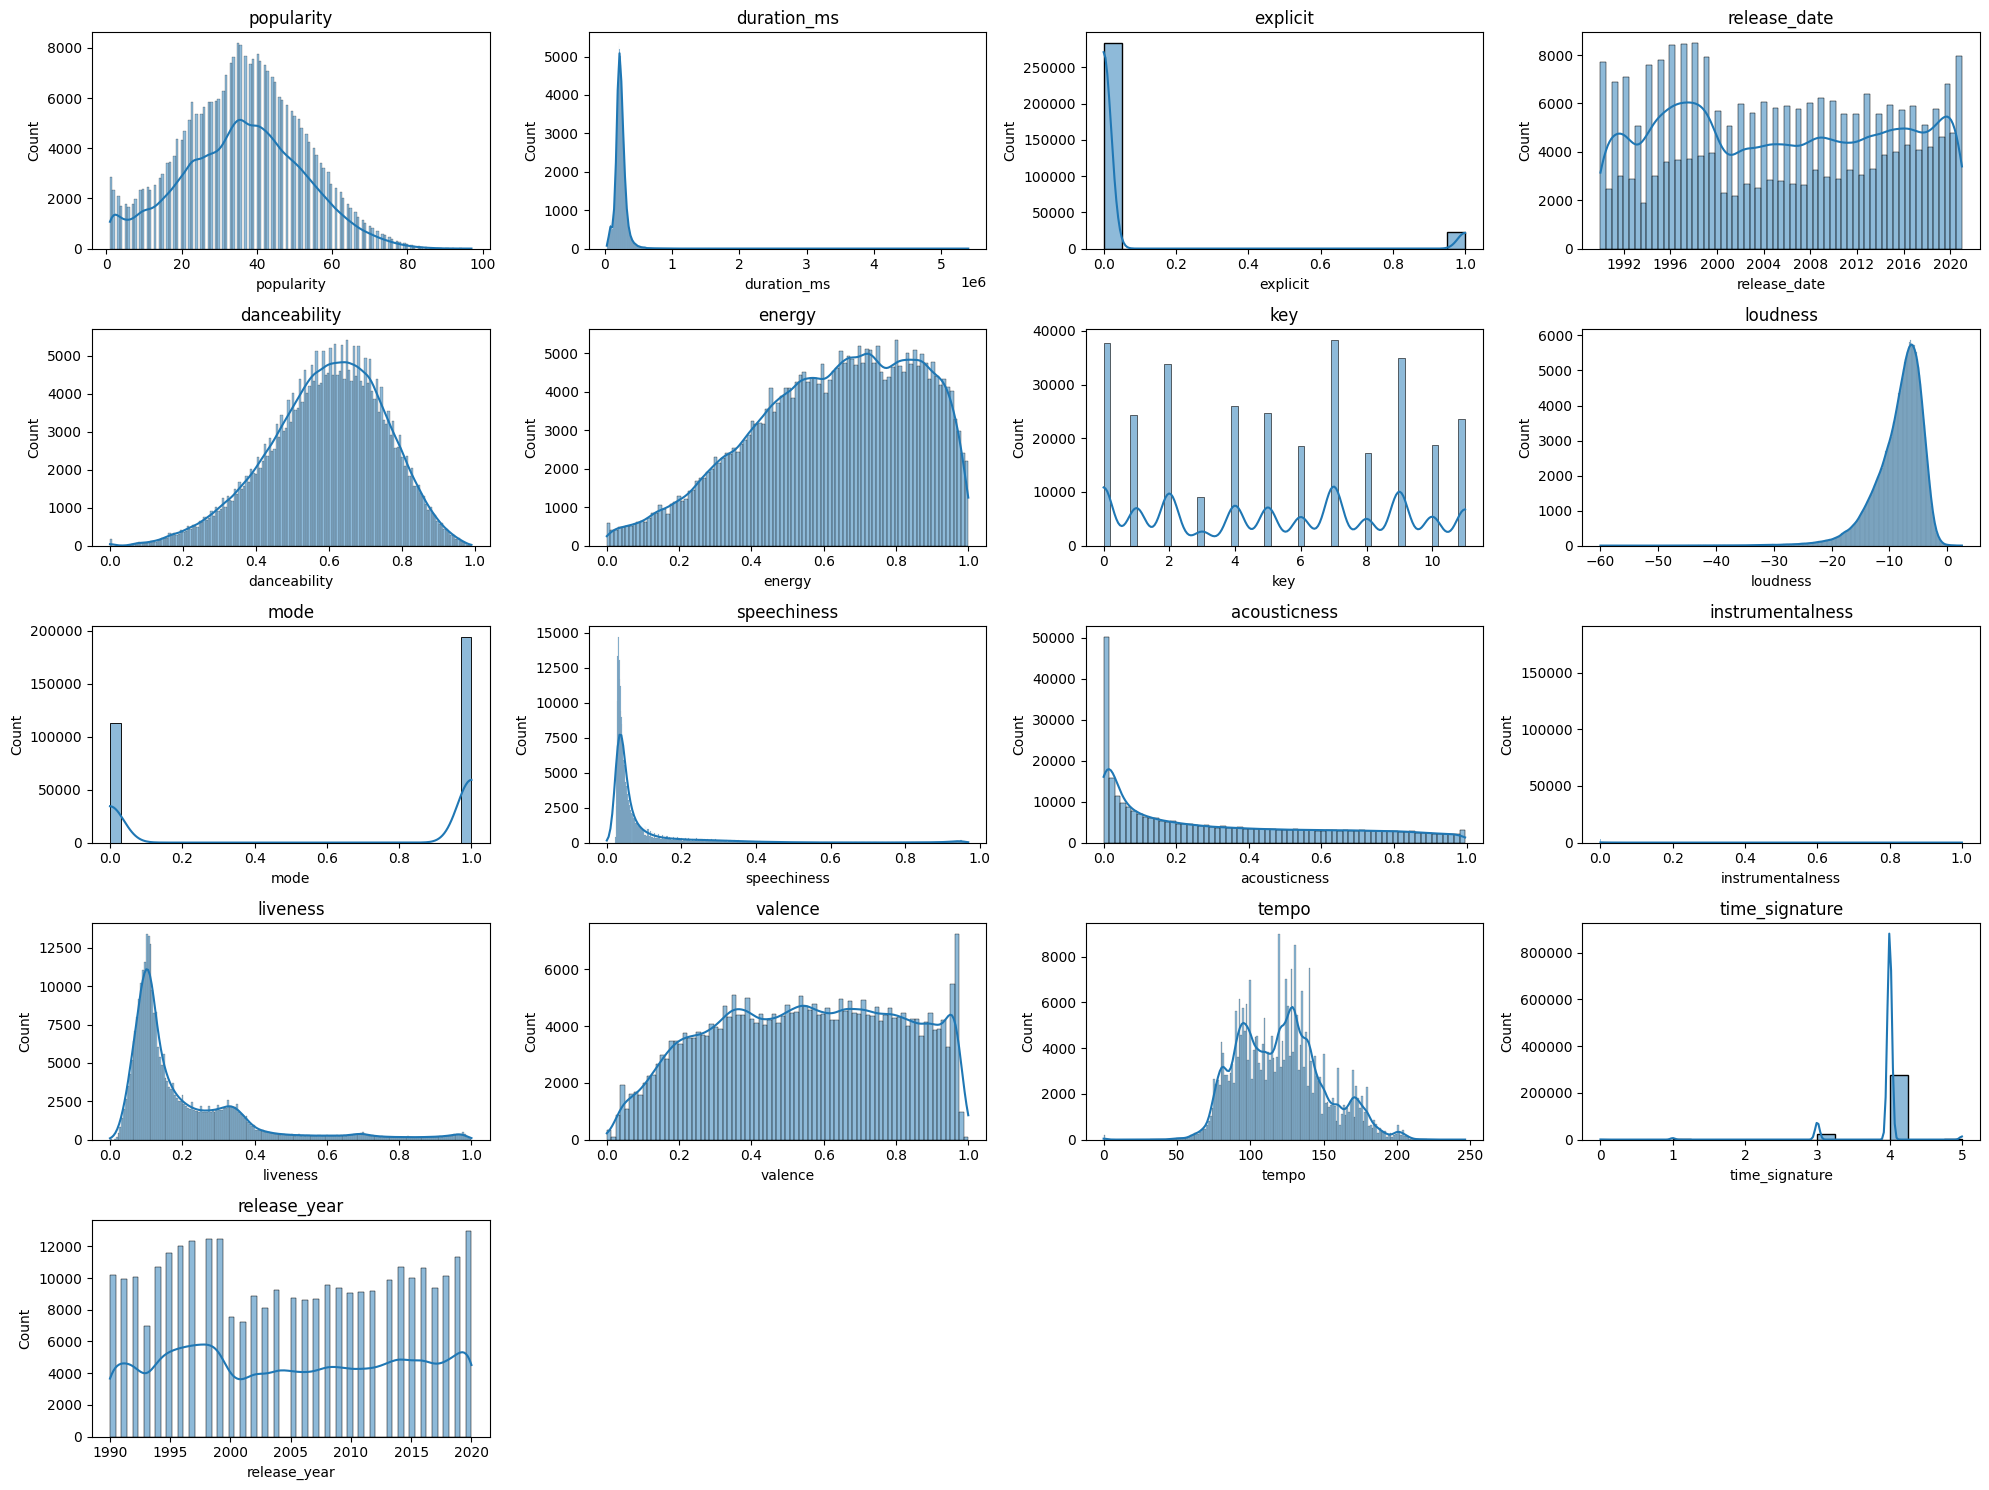

In [29]:
# Source - https://stackoverflow.com/a/50774730
# Posted by ImportanceOfBeingErnest, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-15, License - CC BY-SA 4.0
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(5,4,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [30]:
df = df.drop(columns = ['release_date', 'time_signature'])

In [31]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,32,399000,0,0.120,0.0384,2,-23.130,1,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,1990
1,26,105773,0,0.651,0.4030,9,-18.081,0,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,1990
2,27,156373,0,0.666,0.2510,0,-15.409,1,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,1990
3,27,152693,0,0.716,0.3790,4,-16.092,1,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,1990
4,27,288613,0,0.738,0.3920,0,-12.055,1,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314893,14,185714,0,0.759,0.7050,8,-5.939,1,0.1330,0.00701,0.595000,0.0356,0.6650,83.985,2020
314894,13,117091,1,0.651,0.8620,5,-4.246,1,0.0852,0.00406,0.000293,0.2860,0.5440,164.861,2020
314895,56,243409,0,0.522,0.5750,2,-4.722,1,0.0280,0.06260,0.000000,0.3820,0.4740,87.879,2020
314896,59,184323,0,0.842,0.7570,5,-6.339,0,0.2810,0.06000,0.000000,0.0628,0.5780,111.938,2020


In [32]:
categorical = ['key', 'mode', 'explicit']  #

log_transform = ['duration_ms', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness']

continuous = ['danceability', 'energy', 'loudness', 
              'valence', 'tempo', 'release_year']

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[['key', 'mode', 'explicit']])

In [34]:
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())

In [35]:
df_encoded

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_0,explicit_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
306933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
306934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
306935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
df = df.reset_index()

In [37]:
df

,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,0,32,399000,0,0.120,0.0384,2,-23.130,1,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,1990
1,1,26,105773,0,0.651,0.4030,9,-18.081,0,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,1990
2,2,27,156373,0,0.666,0.2510,0,-15.409,1,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,1990
3,3,27,152693,0,0.716,0.3790,4,-16.092,1,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,1990
4,4,27,288613,0,0.738,0.3920,0,-12.055,1,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306932,314893,14,185714,0,0.759,0.7050,8,-5.939,1,0.1330,0.00701,0.595000,0.0356,0.6650,83.985,2020
306933,314894,13,117091,1,0.651,0.8620,5,-4.246,1,0.0852,0.00406,0.000293,0.2860,0.5440,164.861,2020
306934,314895,56,243409,0,0.522,0.5750,2,-4.722,1,0.0280,0.06260,0.000000,0.3820,0.4740,87.879,2020
306935,314896,59,184323,0,0.842,0.7570,5,-6.339,0,0.2810,0.06000,0.000000,0.0628,0.5780,111.938,2020


In [38]:
df_encoded = df_encoded.reset_index()

In [39]:
df_encoded

,index,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,explicit_0,explicit_1
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306932,306932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
306933,306933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
306934,306934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
306935,306935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [40]:
final_df = pd.merge(df_encoded, df, on = 'index', how = 'inner') 

In [41]:
final_df

,index,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,-23.130,1,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,1990
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,-18.081,0,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,1990
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,-15.409,1,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,1990
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4,-16.092,1,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,1990
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,-12.055,1,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299403,306932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6,-4.739,1,0.0331,0.68300,0.000188,0.2540,0.3280,86.819,2020
299404,306933,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2,-2.367,1,0.0351,0.00420,0.000000,0.2060,0.8470,139.939,2020
299405,306934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,-15.342,0,0.0507,0.00695,0.389000,0.1390,0.2940,115.007,2020
299406,306935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,-4.478,0,0.0366,0.44000,0.000000,0.0859,0.2030,76.348,2020


In [42]:
final_df.columns

Index(['index', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1', 'popularity', 'duration_ms', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'release_year'],
      dtype='object')

In [43]:
final_df = final_df.drop(columns = ['key', 'mode', 'explicit'])

In [44]:
final_df.columns

Index(['index', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1',
       'explicit_0', 'explicit_1', 'popularity', 'duration_ms', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'release_year'],
      dtype='object')

In [45]:
final_df = final_df.drop(columns = 'index')

### Model Selection and Training/Test

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
X = final_df.drop(columns=['popularity'])
y = final_df['popularity']

In [48]:
X

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,...,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120,0.0384,-23.130,0.0425,0.98000,0.768000,0.1040,0.0714,92.792,1990
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.651,0.4030,-18.081,0.3480,0.40500,0.000016,0.8310,0.7310,99.537,1990
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.666,0.2510,-15.409,0.7630,0.91400,0.000000,0.3780,0.2950,128.054,1990
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.716,0.3790,-16.092,0.5320,0.63600,0.000000,0.5490,0.9340,132.624,1990
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.738,0.3920,-12.055,0.2700,0.91900,0.000000,0.3950,0.6880,103.320,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.433,0.6790,-4.739,0.0331,0.68300,0.000188,0.2540,0.3280,86.819,2020
299404,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.563,0.9240,-2.367,0.0351,0.00420,0.000000,0.2060,0.8470,139.939,2020
299405,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.703,0.2340,-15.342,0.0507,0.00695,0.389000,0.1390,0.2940,115.007,2020
299406,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.475,0.6730,-4.478,0.0366,0.44000,0.000000,0.0859,0.2030,76.348,2020


In [49]:
y

0         32
1         26
2         27
3         27
4         27
          ..
299403    28
299404    68
299405    54
299406    44
299407    56
Name: popularity, Length: 299408, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
log_cols = ['duration_ms', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
X_train[log_cols] = np.log1p(X_train[log_cols])
X_test[log_cols] = np.log1p(X_test[log_cols])

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,...,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
235387,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.514,0.531,-7.064,0.038932,0.395415,0.000102,0.122218,0.320,168.015,2014
67646,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.352,0.763,-7.481,0.033338,0.059023,0.000009,0.222343,0.291,98.069,1996
79952,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360,0.976,-3.513,0.178146,0.014692,0.000002,0.567584,0.424,97.412,1997
181821,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.730,0.875,-4.773,0.040662,0.386622,0.000002,0.621114,0.805,114.998,2008
133654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.690,0.767,-3.411,0.131028,0.020489,0.000000,0.123102,0.668,187.993,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.875,0.475,-12.673,0.094037,0.364643,0.542324,0.044973,0.384,99.958,2001
259178,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.716,0.837,-6.768,0.027907,0.169743,0.000000,0.284427,0.909,125.113,2016
131932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.547,0.907,-6.106,0.033918,0.005485,0.000098,0.248421,0.689,114.611,2002
146867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.592,0.548,-8.238,0.024107,0.288931,0.000000,0.105261,0.423,89.963,2004


In [54]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross validation for each metric
rmse_scores = cross_val_score(rf, X_train, y_train, 
                               cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
mae_scores  = cross_val_score(rf, X_train, y_train, 
                               cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
r2_scores   = cross_val_score(rf, X_train, y_train, 
                               cv=kf, scoring='r2', n_jobs=-1)

# sklearn returns negative scores for error metrics, flip them
rmse_scores = -rmse_scores
mae_scores  = -mae_scores

print("Random Forest 5-Fold Cross Validation Results:")
print(f"  RMSE:  {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
print(f"  MAE:   {mae_scores.mean():.4f}  (+/- {mae_scores.std():.4f})")
print(f"  R²:    {r2_scores.mean():.4f}  (+/- {r2_scores.std():.4f})")
print()
print("Per-fold R² scores:", np.round(r2_scores, 4))

KeyboardInterrupt: 

#

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

Random Forest Results:
  RMSE: 13.2751
  MAE:  10.3901
  R²:   0.3107


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Results:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE:  {mae:.4f}")
print(f"  R²:   {r2:.4f}")

Gradient Boosting Results:
  RMSE: 13.9088
  MAE:  10.9990
  R²:   0.2433


In [ ]:
from xgboost import XGBRegressor

In [ ]:

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(f"Gradient Boosting Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"R²:   {r2_score(y_test, y_pred_xgb):.4f}")

RMSE: 13.5602
MAE:  10.6708
R²:   0.2807


In [ ]:
X

NameError: name 'X' is not defined

In [55]:
from sklearn.utils import resample

# Sample 50,000 rows for CV
X_cv, y_cv = resample(X_train, y_train, n_samples=50000, random_state=42)

rmse_scores = cross_val_score(rf, X_cv, y_cv,
                               cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
mae_scores  = cross_val_score(rf, X_cv, y_cv,
                               cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
r2_scores   = cross_val_score(rf, X_cv, y_cv,
                               cv=kf, scoring='r2', n_jobs=-1)

In [56]:
rmse_scores

array([-12.75987333, -12.92007256, -12.71511816, -12.73407713,
       -12.83418709])

In [57]:
mae_scores

array([-9.71470283, -9.79314354, -9.69967727, -9.64916856, -9.76680513])

In [58]:
r2_scores

array([0.36909303, 0.35790464, 0.37896713, 0.36281352, 0.37561483])

In [60]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Nystroem approximates the RBF kernel, LinearSVR trains fast
nystroem_svr = Pipeline([
    ('nystroem', Nystroem(kernel='rbf', n_components=300, random_state=42)),
    ('svr', LinearSVR(C=1.0, epsilon=0.1, max_iter=1000))
])

nystroem_svr.fit(X_train_scaled, y_train)
y_pred_svr = nystroem_svr.predict(X_test_scaled)

print(f"Nystroem + LinearSVR Results:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred_svr):.4f}")
print(f"  R²:   {r2_score(y_test, y_pred_svr):.4f}")

/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Nystroem + LinearSVR Results:
  RMSE: 14.3100
  MAE:  11.2365
  R²:   0.1990


/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [61]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

nystroem_svr = Pipeline([
    ('scaler', StandardScaler()),        # re-scale inside pipeline as safety net
    ('nystroem', Nystroem(kernel='rbf', 
                           n_components=300, 
                           random_state=42)),
    ('svr', LinearSVR(C=0.1,            # reduce C to stabilize
                      epsilon=0.1, 
                      max_iter=5000,     # give it more iterations to converge
                      dual=False))       # dual=False is more stable for large datasets
])

nystroem_svr.fit(X_train_scaled, y_train)
y_pred_svr = nystroem_svr.predict(X_test_scaled)

print(f"Nystroem + LinearSVR Results:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred_svr):.4f}")
print(f"  R²:   {r2_score(y_test, y_pred_svr):.4f}")

/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False

In [62]:
nystroem_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('nystroem', Nystroem(kernel='rbf', 
                           n_components=300, 
                           random_state=42)),
    ('svr', LinearSVR(C=0.1,
                      epsilon=0.1, 
                      max_iter=5000))
])

nystroem_svr.fit(X_train_scaled, y_train)
y_pred_svr = nystroem_svr.predict(X_test_scaled)

print(f"Nystroem + LinearSVR Results:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred_svr):.4f}")
print(f"  R²:   {r2_score(y_test, y_pred_svr):.4f}")

/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Nystroem + LinearSVR Results:
  RMSE: 14.4616
  MAE:  11.3762
  R²:   0.1819


/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/FM/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
